In [4]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
%matplotlib inline

## Non-Stationary time series

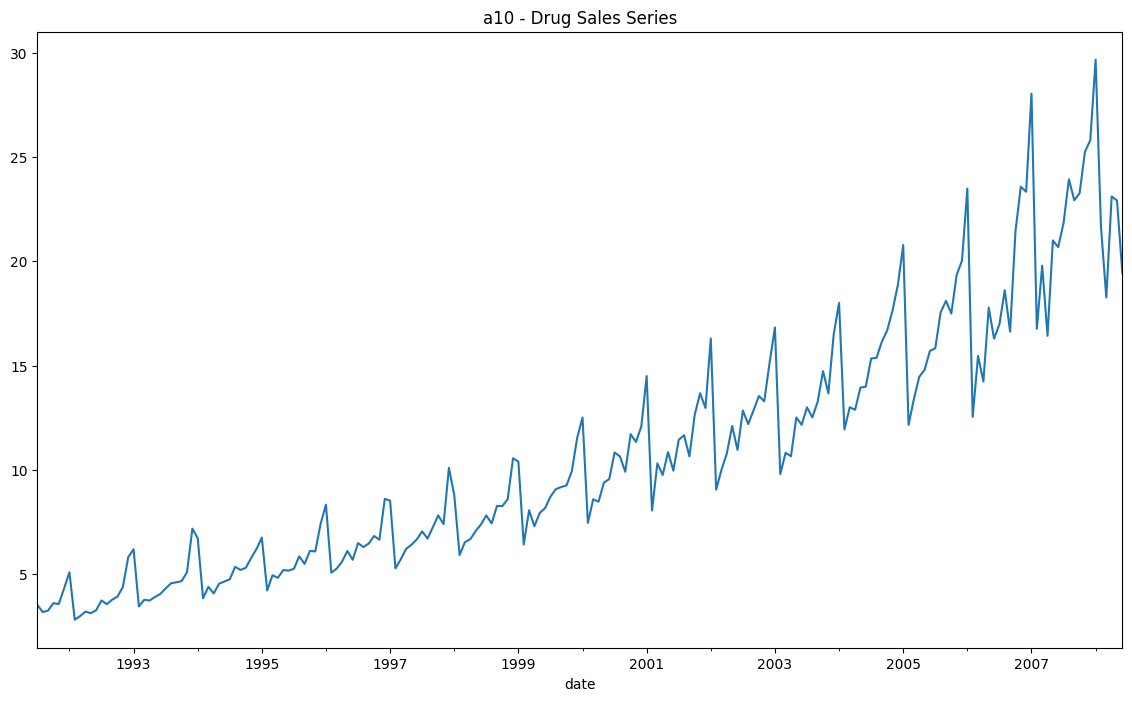

In [2]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
series = df.loc[:, 'value'].values
df.plot(figsize=(14,8), legend=None, title='a10 - Drug Sales Series');

autolag: {‘AIC’, ‘BIC’, ‘t-stat’, None}, optional
- If None, then maxlag = 12*(nobs/100)^{1/4} is used where nobs is the number of observations.
- If ‘AIC’, then adfuller will choose the number of lags that yields the lowest AIC
- If p-value is close to significant, increase the number of lags. 

And if the p-value is still greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary. As shown in below example.

In [3]:

result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: 3.14518568930675
n_lags: 1.0
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


## Stationary time series

In [8]:
# ADF test on random numbers
series = np.random.randn(100)
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'n_lags: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -10.270141054972497
p-value: 4.021595152531918e-18
n_lags: 4.021595152531918e-18
Critial Values:
   1%, -3.498198082189098
Critial Values:
   5%, -2.891208211860468
Critial Values:
   10%, -2.5825959973472097


The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.

## Creating a helper function

In [8]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    statistic, p_value, n_lags, _, critical_values, _ = adfuller(series, autolag='AIC')
    # Format Output
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value > 0.05 else ""}stationary')

In [17]:
print("Calculating ADF test for X...")
adf_test(series)

Calculating ADF test for X...
ADF Statistic: 3.14518568930675
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


# Test our signals

## Sine signal

In [12]:
sine_wave_df = pd.read_csv('../data/data_collected_v1.csv', names=['signal1'])

sine_wave_df.head()

,signal1
0,0.000000
1,0.000000
2,0.005000
3,0.010000
4,0.014999


In [6]:
x_signal = sine_wave_df['signal1'].values

In [18]:
adf_test(x_signal)

ADF Statistic: -21229190717443.73
p-value: 0.0
Critial Values:
   1%, -3.4344850561115794
Critial Values:
   5%, -2.8633663819052977
Critial Values:
   10%, -2.567742331665774


## Exo-leg signal

In [5]:
exo_leg_data_df = pd.read_csv('../data/exo_hip_right_2022_12_13-18_02.csv')

In [9]:
adf_test(exo_leg_data_df.values)

ADF Statistic: -6.304346800677341
p-value: 3.35195195331224e-08
num lags: 17
Critial Values:
   1% : -3.4320797760427144
   5% : -2.862304319856036
   10% : -2.5671768576612166
Result: The series is stationary


## KPSS test
The KPSS test, short for, Kwiatkowski-Phillips-Schmidt-Shin (KPSS), is a type of Unit root test that tests for the stationarity of a given series around a deterministic trend.

### KPSS test helper function

In [2]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')



### Non-Stationary Series 

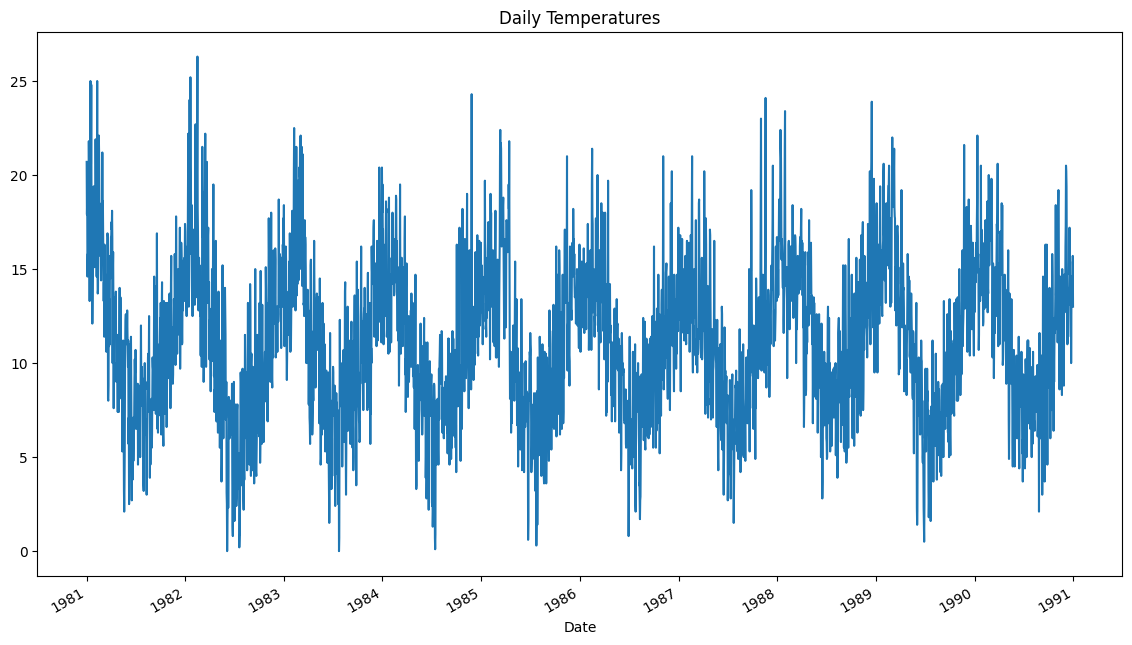

In [11]:

path = 'https://raw.githubusercontent.com/selva86/datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
df.plot(title='Daily Temperatures', figsize=(14,8), legend=None);

In [25]:
kpss_test(series)

KPSS Statistic: 2.0131256386303322
p-value: 0.01
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


d:\STUDY MATERIAL\Masters Study Material\WS2022\Thesis\CodeBase\thesis-env\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### Non stationary series with deterministic trends

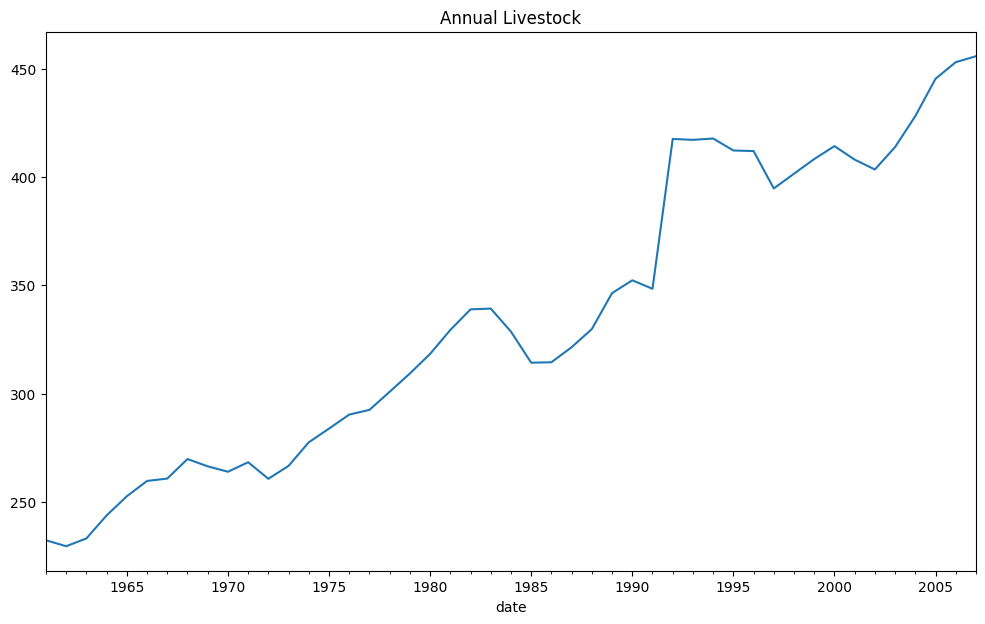

In [28]:
import pandas as pd
import numpy as np
path = 'https://raw.githubusercontent.com/selva86/datasets/master/livestock.csv'
df = pd.read_csv(path, parse_dates=['date'], index_col='date')
df.plot(title='Annual Livestock', figsize=(12,7), legend=None);

Stationary test around mean

In [29]:
# KPSS test: stationarity around a trend
series = df.loc[:, 'value'].values
kpss_test(series)

KPSS Statistic: 1.026377056837458
p-value: 0.01
num lags: 4
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


d:\STUDY MATERIAL\Masters Study Material\WS2022\Thesis\CodeBase\thesis-env\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Stationary test around deterministic trend

In [30]:
kpss_test(series, regression='ct')

KPSS Statistic: 0.0667931394982902
p-value: 0.1
num lags: 3
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


d:\STUDY MATERIAL\Masters Study Material\WS2022\Thesis\CodeBase\thesis-env\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


: 

# Testing our signal

## Exo-leg signal

In [7]:
kpss_test(exo_leg_data_df.values)

KPSS Statistic: 0.05670701380009725
p-value: 0.1
num lags: 38
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


d:\STUDY MATERIAL\Masters Study Material\WS2022\Thesis\CodeBase\thesis-env\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [1]:
kpss_test(exo_leg_data_df, regression='ct')

NameError: name 'kpss_test' is not defined